<a href="https://colab.research.google.com/github/MarcoCarnaghi-fi/UNS_Aprendizaje_Maquina_2021/blob/main/SVM_Classifier/GenreClassification_Carnaghi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de género musical
El conjunto de datos consta de 1000 pistas de audio cada 30 segundos de duración. Contiene 10 géneros, cada uno representado por 100 pistas. Las pistas son archivos de audio monofónicos de 16 bits a 22050Hz en formato .wav. Su tarea es extraer características de audio y crear un modelo capaz de clasificar pistas por género usando estas características. Puede encontrar este [notebook](https://colab.research.google.com/github/emmanueliarussi/DataScienceCapstone/blob/master/3_MidtermProjects/ProjectGTZ/additional/Test_Audio.ipynb.ipynb) útil para abrir y explorar pistas de audio. Para este proyecto, intente hacer más énfasis en el lado de la extracción de características que en el modelo de clasificador. Más información [aquí](https://www.kaggle.com/carlthome/gtzan-genre-collection). 

In [2]:
# Descargar 
dataroot = "dataroot/"
!mkdir dataroot 
!wget -P dataroot http://opihi.cs.uvic.ca/sound/genres.tar.gz

mkdir: cannot create directory ‘dataroot’: File exists
--2021-10-19 11:58:10--  http://opihi.cs.uvic.ca/sound/genres.tar.gz
Resolving opihi.cs.uvic.ca (opihi.cs.uvic.ca)... 142.104.68.135
Connecting to opihi.cs.uvic.ca (opihi.cs.uvic.ca)|142.104.68.135|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1225571541 (1.1G) [application/x-gzip]
Saving to: ‘dataroot/genres.tar.gz.1’

genres.tar.gz.1      66%[============>       ] 779.55M  1.62MB/s    eta 4m 1s  ^C


In [3]:
# descomprimir
import tarfile
with tarfile.open(dataroot+"genres.tar.gz","r:gz") as tar_ref:
    tar_ref.extractall(dataroot)
    tar_ref.close()

In [14]:
from os import listdir
from os.path import isfile, join

#Eliminate extra files
mypath = "dataroot/genres"

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

for i in onlyfiles:
  if os.path.exists(mypath+"/"+i):
    os.remove(mypath+"/"+i)
  else:
    print("The file does not exist")

In [ ]:
# Importar paquetes necesarios para abrir pistas de sonido
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile

In [ ]:
# Cargar una canción
blues = wavfile.read('dataroot/genres/blues/blues.00000.wav')

In [ ]:
# play!
framerate = 22050
Audio(blues[1],rate=framerate,autoplay=True)

In [ ]:
# Veamos cómo se ve
# Removemos calc, para evitar conflictos, y descargamos la versión que nos conviene
!rm calc.*
!wget https://raw.githubusercontent.com/R6500/Python-bits/master/Modules/calc.py

#Importa el modulo calc
import calc

rm: cannot remove 'calc.*': No such file or directory
--2020-10-20 03:38:41--  https://raw.githubusercontent.com/R6500/Python-bits/master/Modules/calc.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20524 (20K) [text/plain]
Saving to: ‘calc.py’

calc.py             100%[===================>]  20.04K  --.-KB/s    in 0.007s  

2020-10-20 03:38:41 (2.62 MB/s) - ‘calc.py’ saved [20524/20524]



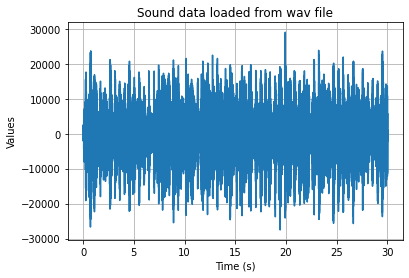

In [ ]:
# plot!
time      = np.arange(0,len(blues[1]))/framerate
calc.plot11(time,blues[1],"Sound data loaded from wav file","Time (s)","Values")

### Feature extraction

The features of interest for this classification can be divided into "time domain", "frequency domain" and "time-frequency domain" features. Where the following can be considered in each case:

* Time domain features :

* * Amplitude envelope (AE)

* * Root -mean-squared energy (RMS)
* * Zero crossing Rate (ZCR)

* Frequency domain features :
* * Band energy ration (BER): It can be interpreted as a measure the relevance of the low frequency components
* * Spectral centroid (SC): It refers to the frequency band where most of the energy is concentrated and it can be interpreted as a measurement of the brightness of the audio track
* * Bandwidth (Bw): Basically, we can think of it as the variance from the spectral centroid

* Time Frequency domain features :
* * Spectrograms
* * Mel - Spectograms, which, basically refers to a proyection of the Spectograms over a given number of frequency bands. It also considers a rescaling process in order to map frequency considering the human perception of frequency variation (which is log and not linear)
* * Mel spectogram Cepstral Coefficients: which refers to the coefficients of the Fourier transform applied to the Mel-spectogram of a given Track. Which talks about the variation of Mel bands influence over quenfrecy [ms]
Usually, low coefficients refers to envelope components, while high coefficients refer to noise, carrier, etc components.

Time-Frequency domain features, such as Stectograms, mel-spectograms and, MFCCs, are commonly used in Deep Learning apps as they bring information about the frequency components of the audio track, and its variations over time.

###### Time Domain Features

In [ ]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [ ]:
#Probe data loading with librosa
metal0_file = "dataroot/genres/metal/metal.00090.wav"
#ipd.Audio(metal0_file)
metal0, sr = librosa.load(metal0_file)

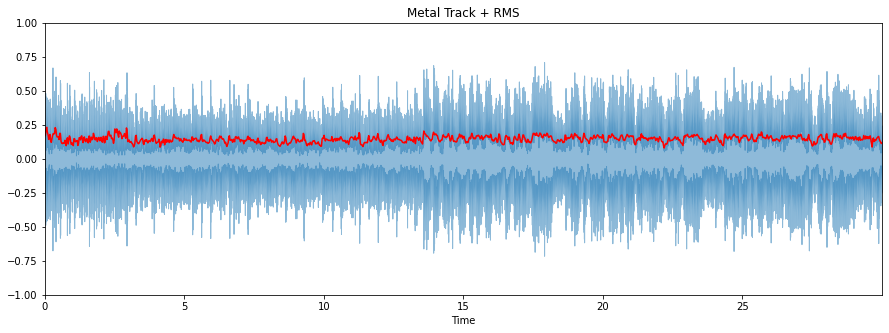

In [ ]:
# RMS extraction with librosa
FRAME_SIZE = 1024
HOP_LENGTH = 512


rms_metal0 = librosa.feature.rms(metal0, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

#Visualization
#time axis generation
frames = range(len(rms_metal0))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# rms energy is graphed in red
plt.figure(figsize=(15, 17))
ax = plt.subplot(3, 1, 1)
librosa.display.waveplot(metal0, alpha=0.5)
plt.plot(t, rms_metal0, color="r")
plt.ylim((-1, 1))
plt.title("Metal Track + RMS")

plt.show()

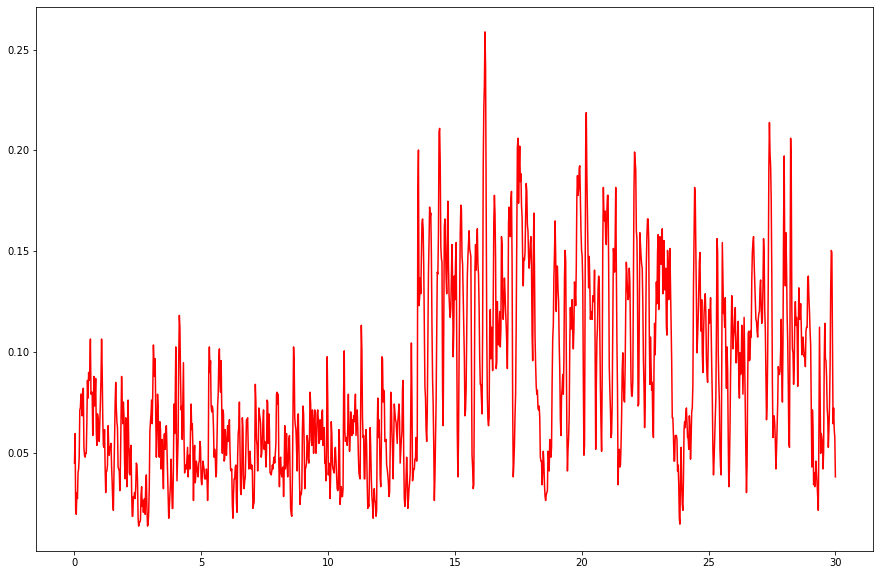

In [ ]:
# Zero crossing rate (ZCR) extraction with librosa
FRAME_SIZE = 1024
HOP_LENGTH = 512

zcr_metal0= librosa.feature.zero_crossing_rate(metal0, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

#Visualization
#time axis generation
frames = range(len(rms_metal0))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15, 10))
plt.plot(t, zcr_metal0, color="r")
plt.show()

In [ ]:
rms_metal0.size

1293

In [ ]:
#useful
#zcr_metal0.size
#zcr_metal0.mean()
#zcr_metal0.std()

0.04505992590802898

###### Frequency Domain features

In [ ]:
#imports 
import math
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [ ]:
#Probe data loading with librosa
metal0_file = "dataroot/genres/metal/metal.00090.wav"
# load audio files with librosa
metal0, sr = librosa.load(metal0_file)

In [ ]:
#Spectogram extraction
FRAME_SIZE = 1024
HOP_SIZE = 512

metal0_spec = librosa.stft(metal0, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [19]:
#Calculate the bin that represents the division between high freq band and low freq band
def calculate_split_frequency_bin(split_frequency, sample_rate, num_frequency_bins):
    """Infer the frequency bin associated to a given split frequency."""
    
    frequency_range = sample_rate / 2
    frequency_delta_per_bin = frequency_range / num_frequency_bins
    split_frequency_bin = math.floor(split_frequency / frequency_delta_per_bin)
    return int(split_frequency_bin)


#Calculate the BER as the ratio between power in low and high freq bands
def band_energy_ratio(spectrogram, split_frequency, sample_rate):
    """Calculate band energy ratio with a given split frequency."""
    
    split_frequency_bin = calculate_split_frequency_bin(split_frequency, sample_rate, len(spectrogram[0]))
    band_energy_ratio = []
    
    # calculate power spectrogram
    power_spectrogram = np.abs(spectrogram) ** 2
    power_spectrogram = power_spectrogram.T
    
    # calculate BER value for each frame
    for frame in power_spectrogram:
        sum_power_low_frequencies = frame[:split_frequency_bin].sum()
        sum_power_high_frequencies = frame[split_frequency_bin:].sum()
        band_energy_ratio_current_frame = sum_power_low_frequencies / sum_power_high_frequencies
        band_energy_ratio.append(band_energy_ratio_current_frame)
    
    return np.array(band_energy_ratio)

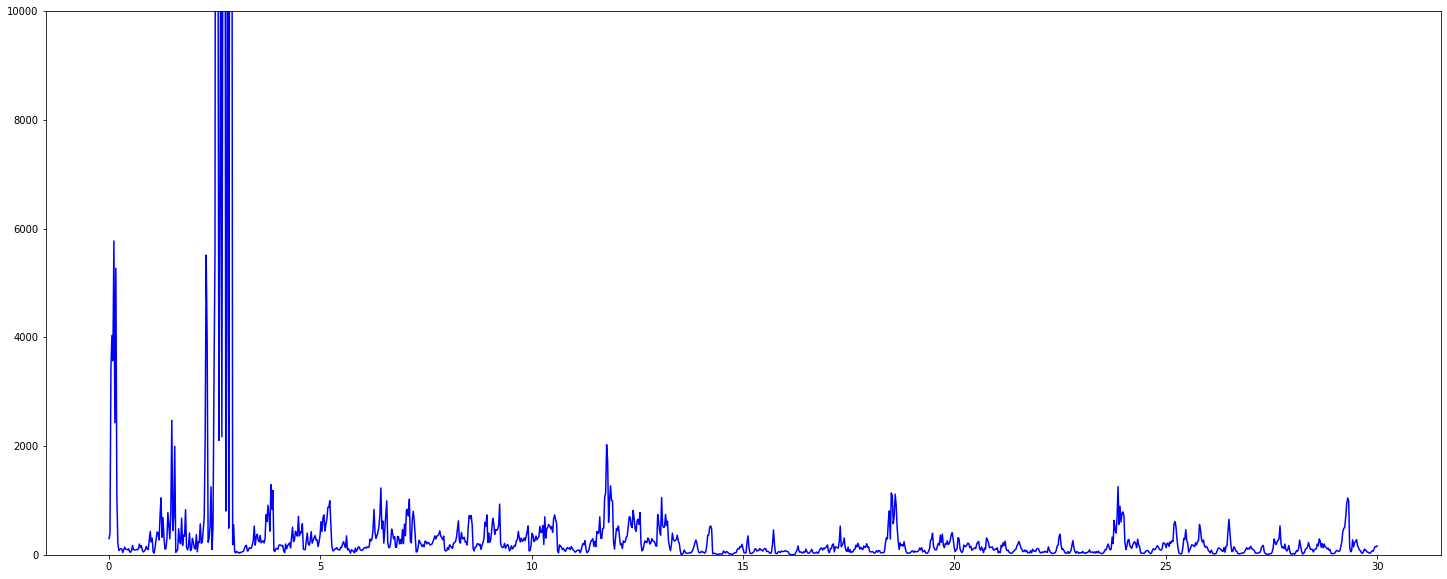

In [ ]:
#Probe considering split freq as 2000Hz
ber_metal0 = band_energy_ratio(metal0_spec, 2000, sr)

#Visualization
#time axis generation
frames = range(len(ber_metal0))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(25, 10))
plt.plot(t, ber_metal0, color="b")
plt.ylim((0, 10000))
plt.show()

In [ ]:
ber_metal0.size

1293

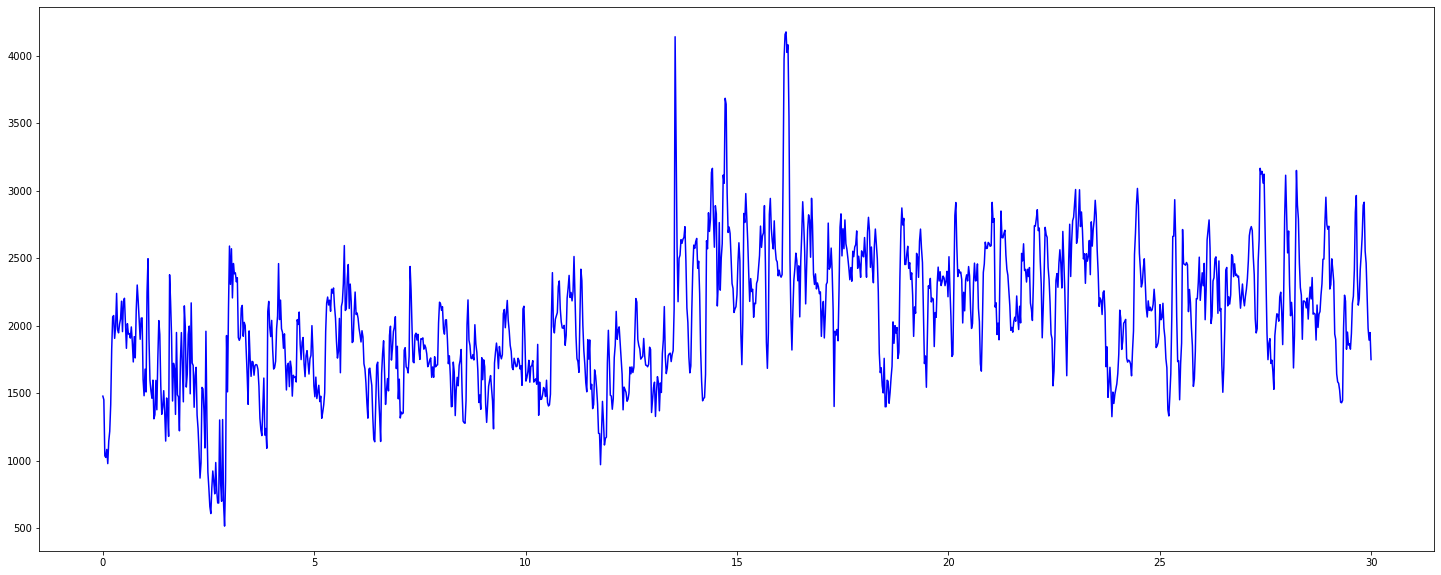

In [ ]:
# Spectral Centroid extraction and visualization
sc_metal0 = librosa.feature.spectral_centroid(y=metal0, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

plt.figure(figsize=(25, 10))
plt.plot(t, sc_metal0, color="b")
#plt.ylim((0, 5000))
plt.show()

In [ ]:
sc_metal0.shape #We get a value for each frame

(1293,)

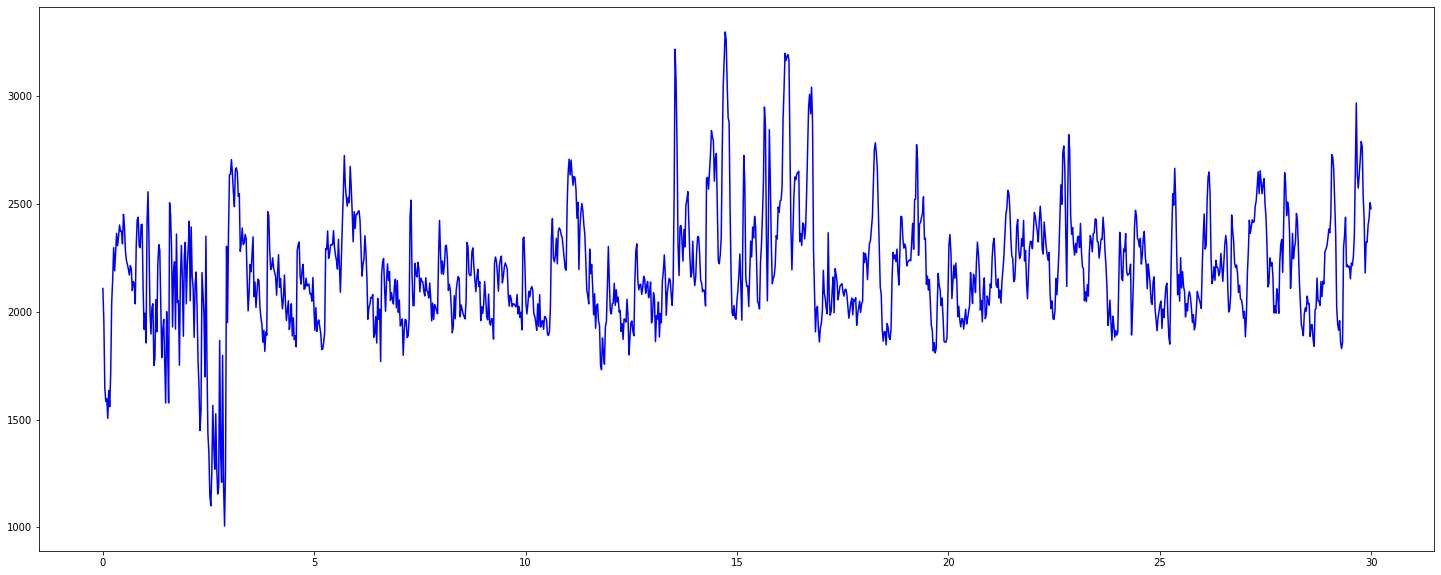

In [ ]:
# Spectral BW extraction and visualization
sbw_metal0 = librosa.feature.spectral_bandwidth(y=metal0, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

plt.figure(figsize=(25, 10))
plt.plot(t, sbw_metal0, color="b")
#plt.ylim((0, 5000))
plt.show()


In [ ]:
sbw_metal0.shape #idem

(1293,)

##### Time-Frequency Domain Features

Mostly, I'll be using the Mel-Frequency Cepstral Coefficients and its first 2 derivatives, because they represent the change in this representation over the time of the audio track/data

In [ ]:
#Get 13 MFCCs
mfcc_metal0 = librosa.feature.mfcc(y=metal0, n_mfcc=13, sr=sr)
#First Derivative
delta_mfccs_metal0 = librosa.feature.delta(mfcc_metal0)
#Second Derivative
delta2_mfccs_metal0 = librosa.feature.delta(mfcc_metal0, order=2)

##### Visualization of MFCCs

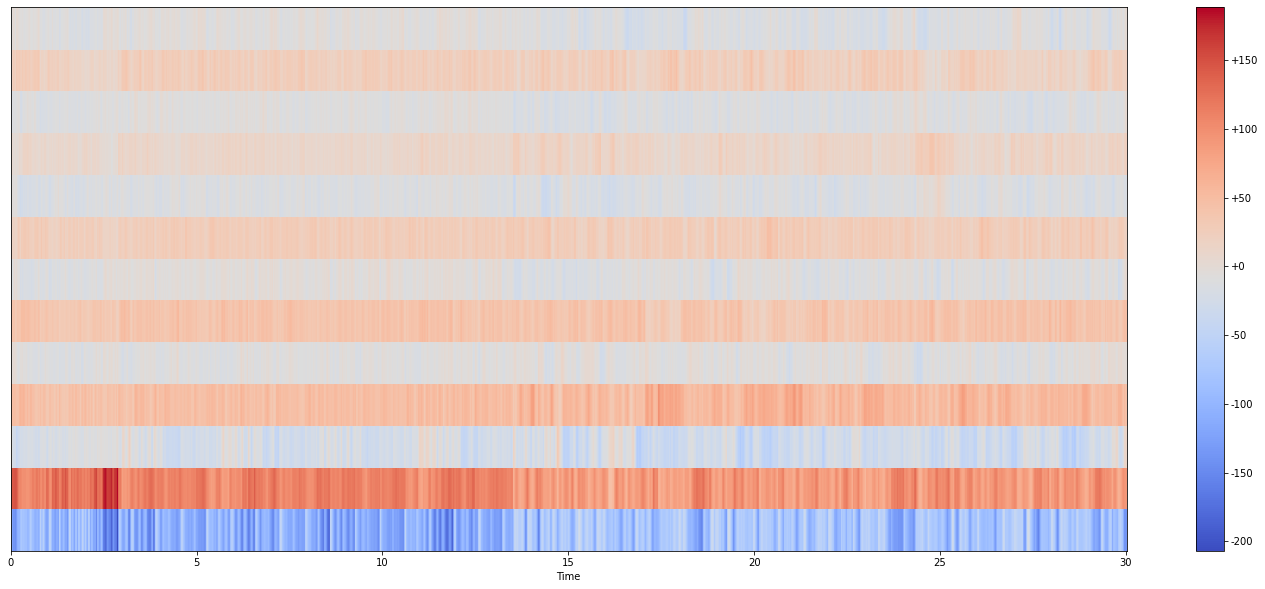

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfcc_metal0, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

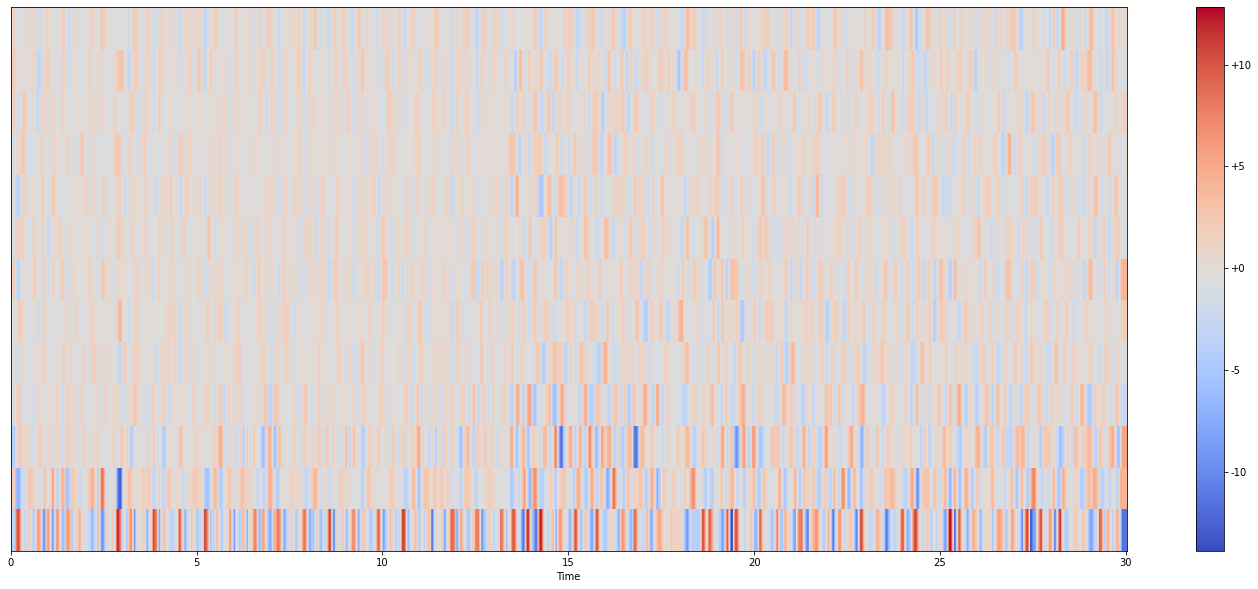

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs_metal0, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

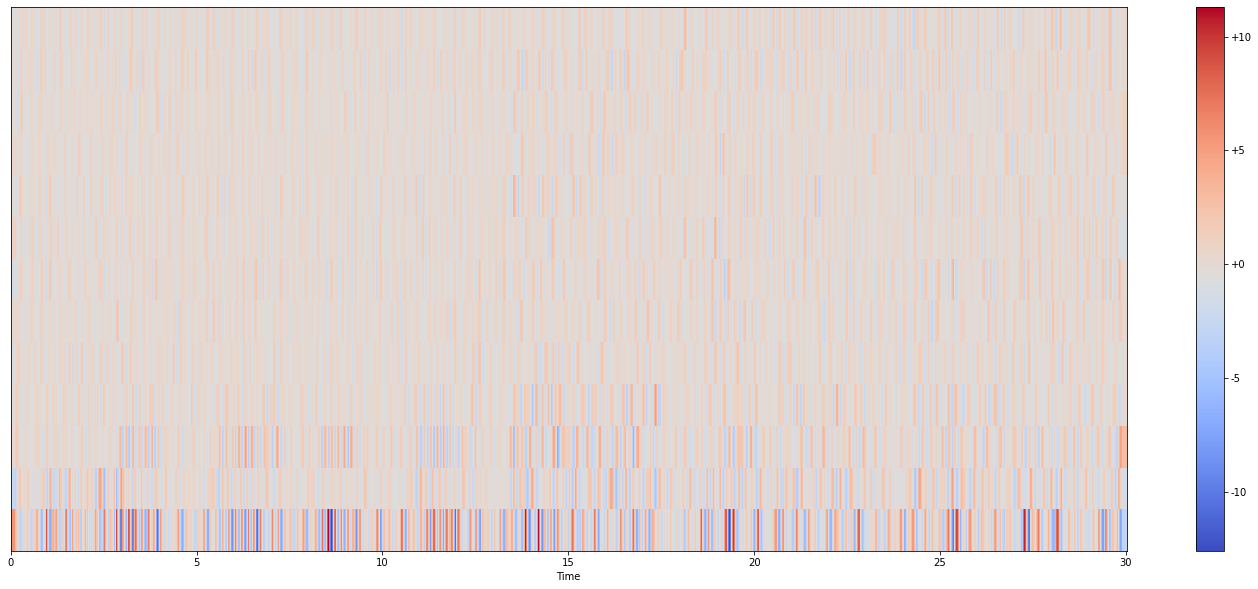

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs_metal0, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

### Feature Vector
As most of the feature whereas they are time domain, frequency domain or time-frequency domain, are calculated for each frame of the audio track, I need to reduce the order of the features I'll feed into de classifier.

In order to do that, I'll calculate the mean and the std of each feature along the audio track. So, instead of having 1293 values for each feature in each audio track, I'll have only 2.

In [ ]:
#Time
rms_mean = rms_metal0.mean()
rms_std = rms_metal0.std()

zcr_mean = zcr_metal0.mean()
zcr_std = zcr_metal0.std()

#Frequency
ber_mean = ber_metal0.mean()
ber_std = ber_metal0.std()

sc_mean = sc_metal0.mean()
sc_std = sc_metal0.std()

sbw_mean = sbw_metal0.mean()
sbw_sd = sbw_metal0.std()

1

In [ ]:
mfcc_mean = [0 for i in range(mfcc_metal0.shape[0])]
mfcc_std = [0 for i in range(mfcc_metal0.shape[0])]

delta_mfcc_mean = [0 for i in range(mfcc_metal0.shape[0])]
delta_mfcc_std = [0 for i in range(mfcc_metal0.shape[0])]

delta2_mfcc_mean = [0 for i in range(mfcc_metal0.shape[0])]
delta2_mfcc_std = [0 for i in range(mfcc_metal0.shape[0])]


for i in range(mfcc_metal0.shape[0]):
  mfcc_mean[i] = mfcc_metal0[i,:].mean()
  mfcc_std[i] = mfcc_metal0[i,:].std()

  delta_mfcc_mean[i] = delta_mfccs_metal0[i,:].mean()
  delta_mfcc_std[i] = delta_mfccs_metal0[i,:].std()

  delta2_mfcc_mean[i] = delta2_mfccs_metal0[i,:].mean()
  delta2_mfcc_std[i] = delta2_mfccs_metal0[i,:].std()



In [ ]:
len(delta_mfcc_mean)

13

### Loading Data

The aim of this section is to load the data to transform it in a structured data set.

Once, data is preprocessed, feature extraction can be made.


In [51]:
import json
import os
import math

import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd



DATASET_PATH = "dataroot"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

FRAME_SIZE = 1024
HOP_LENGTH = 512

def save_feature(dataset_path, json_path, num_mfcc=13, n_fft=2048, frame_size = 1024 ,hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :para frame_size(int): Number of samples in each frame for time domain feature extraction
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "RMS_MEAN": [],
        "RMS_STD": [],
        "ZCR_MEAN": [],
        "ZCR_STD": [],
        "BER_MEAN": [],
        "BER_STD": [],
        "SC_MEAN": [],
        "SC_STD": [],
        "SBW_MEAN": [],
        "SBW_STD": [],
        "MFCC_MEAN": [],
        "MFCC_STD": [],
        "DELTA_MFCC_MEAN": [],
        "DELTA_MFCC_STD": [],
        "DELTA2_MFCC_MEAN": [],
        "DELTA2_MFCC_STD" : []

    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

	            	# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                
                data["labels"].append(i-1)

                #--------------------
                #Time domain features
                rms_signal = librosa.feature.rms(signal, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
                zcr_signal= librosa.feature.zero_crossing_rate(signal, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
                #Feature reduction
                rms_mean = rms_signal.mean()
                rms_std = rms_signal.std()
                zcr_mean = zcr_signal.mean()
                zcr_std = zcr_signal.std()
                data["RMS_MEAN"].append(rms_mean)
                data["RMS_STD"].append(rms_std)
                data["ZCR_MEAN"].append(zcr_mean)
                data["ZCR_STD"].append(zcr_std)

                #--------------------
                #Frequency domain features
                spec_signal = librosa.stft(signal, n_fft=n_fft, hop_length=HOP_LENGTH)
                ber_signal = band_energy_ratio(spec_signal, 2000, sample_rate)
                sc_signal = librosa.feature.spectral_centroid(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=HOP_LENGTH)[0]
                sbw_signal = librosa.feature.spectral_bandwidth(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=HOP_LENGTH)[0]
                #
                ber_mean = ber_signal.mean()
                ber_std = ber_signal.std()

                sc_mean = sc_signal.mean()
                sc_std = sc_signal.std()

                sbw_mean = sbw_signal.mean()
                sbw_std = sbw_signal.std()

                data["BER_MEAN"].append(ber_mean)
                data["BER_STD"].append(ber_std)
                data["SC_MEAN"].append(sc_mean)
                data["SC_STD"].append(sc_std)
                data["SBW_MEAN"].append(sbw_mean)
                data["SBW_STD"].append(sbw_std)

                #--------------------
                #Time Frequency Domain Features
                #Get 13 MFCCs
                mfcc_signal = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sample_rate)
                #First Derivative
                delta_mfccs_signal = librosa.feature.delta(mfcc_signal)
                #Second Derivative
                delta2_mfccs_sinal = librosa.feature.delta(mfcc_signal, order=2)   

                mfcc_mean = [0 for i in range(mfcc_signal.shape[0])]
                mfcc_std = [0 for i in range(mfcc_signal.shape[0])]

                delta_mfcc_mean = [0 for i in range(mfcc_signal.shape[0])]
                delta_mfcc_std = [0 for i in range(mfcc_signal.shape[0])]

                delta2_mfcc_mean = [0 for i in range(mfcc_signal.shape[0])]
                delta2_mfcc_std = [0 for i in range(mfcc_signal.shape[0])]


                for j in range(mfcc_signal.shape[0]):
                  mfcc_mean[j] = mfcc_signal[j,:].mean()
                  mfcc_std[j] = mfcc_signal[j,:].std()

                  delta_mfcc_mean[j] = delta_mfccs_signal[j,:].mean()
                  delta_mfcc_std[j] = delta_mfccs_signal[j,:].std()

                  delta2_mfcc_mean[j] = delta2_mfccs_sinal[j,:].mean()
                  delta2_mfcc_std[j] = delta2_mfccs_sinal[j,:].std()

                """data["MFCC_MEAN"].append(mfcc_mean.tolist())
                data["MFCC_STD"].append(mfcc_std.tolist())
                data["DELTA_MFCC_MEAN"].append(delta_mfcc_mean.tolist())
                data["DELTA_MFCC_STD"].append(delta_mfcc_std.tolist())
                data["DELTA2_MFCC_MEAN"].append(delta2_mfcc_mean.tolist())
                data["DELTA2_MFCC_STD"].append(delta2_mfcc_std.tolist())"""
                data["MFCC_MEAN"].append(mfcc_mean)
                data["MFCC_STD"].append(mfcc_std)
                data["DELTA_MFCC_MEAN"].append(delta_mfcc_mean)
                data["DELTA_MFCC_STD"].append(delta_mfcc_std)
                data["DELTA2_MFCC_MEAN"].append(delta2_mfcc_mean)
                data["DELTA2_MFCC_STD"].append(delta2_mfcc_std)


    return data
    # save MFCCs to json file
    #with open(json_path, "w") as fp:
    #    json.dump(data, fp, indent=4)


In [52]:
DATA_DICT = save_feature(DATASET_PATH, JSON_PATH, frame_size = FRAME_SIZE ,hop_length=HOP_LENGTH)


Processing: genres

Processing: pop

Processing: disco

Processing: metal

Processing: jazz

Processing: country

Processing: blues

Processing: rock

Processing: classical


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in float_scalars



Processing: reggae

Processing: hiphop


In [53]:
DATA_DICT

{'BER_MEAN': [59.0712,
  13.464526,
  42.10336,
  210.88824,
  127.29121,
  24.244232,
  20.089224,
  22.48908,
  497.56592,
  471.25623,
  32.37509,
  21.104805,
  34.564346,
  98.02529,
  26.306896,
  39.74351,
  73.219406,
  481.01947,
  35.04092,
  30.709581,
  209.52872,
  19.602312,
  65.611916,
  28.229921,
  15.924002,
  101.98119,
  358.82193,
  37.162655,
  172.98016,
  23.928108,
  62.898777,
  4928.384,
  161.53598,
  42.23011,
  8.581325,
  21.489529,
  34.254017,
  209.21297,
  13.298301,
  115.55801,
  31.063751,
  161.47174,
  84.56136,
  58.859188,
  46.97857,
  49.0654,
  58.173096,
  8.883925,
  49.469463,
  24.37742,
  71.271965,
  121.81258,
  41.14222,
  24.679258,
  73.62599,
  48.17598,
  22.529783,
  69.41957,
  10.351787,
  16.93265,
  19.602312,
  75.46792,
  192.084,
  13.806831,
  64.402084,
  142.40326,
  89.86026,
  367.688,
  47.912655,
  26.903984,
  96.88777,
  20.826784,
  35.998592,
  49.641716,
  47.184753,
  23.393879,
  787.49835,
  104.191124,
  

In [72]:
#save MFCCs to json file
with open(JSON_PATH, "w") as fp:
  json.dump(str(DATA_DICT), fp, indent=4)

In [73]:
import pandas as pd
data_path = "/content/data_10.json"
with open(data_path, "r") as fp:
        jsonread = json.load(fp)
#pd.read_json().head()
#jsonread = pd.read_json("data_10.json") 
#jsondf = pd.DataFrame(jsonread.features.values.tolist)

In [75]:

jsonread.find("nan")

77759

In [68]:
df = pd.DataFrame.from_dict(DATA_DICT)

df.head()

ValueError: ignored

In [71]:
DATA_DICT['MFCC_MEAN']

[[-65.11878,
  65.451965,
  4.1088395,
  32.741226,
  16.9133,
  -5.819377,
  14.964212,
  -0.24165532,
  9.031883,
  8.435175,
  -6.5764503,
  -4.480277,
  -2.6353624],
 [-34.16489,
  40.395576,
  17.487513,
  13.417416,
  13.253479,
  7.45461,
  18.185043,
  2.7261565,
  4.3575253,
  5.8329287,
  -1.1368766,
  3.1180742,
  2.421972],
 [-48.928135,
  62.62801,
  34.24166,
  12.326886,
  16.562141,
  8.6092615,
  8.763157,
  5.252517,
  6.796359,
  9.0620775,
  -4.0816045,
  -0.7419593,
  -0.38008663],
 [-125.93882,
  117.329414,
  -0.0654025,
  10.217746,
  4.495072,
  2.1813385,
  -3.6386087,
  3.3810308,
  1.7363274,
  4.555352,
  0.8432986,
  2.4306147,
  -3.1062973],
 [-36.625267,
  73.05996,
  39.158207,
  20.333044,
  12.51073,
  2.1546597,
  11.729038,
  -2.4213943,
  6.641529,
  3.165004,
  -5.399322,
  -3.150937,
  -5.771765],
 [9.613276,
  88.861855,
  -20.309454,
  5.121938,
  -2.9060028,
  -0.17131223,
  0.3364731,
  1.6108251,
  -2.2684178,
  -0.9532886,
  -6.211016,
  -2

nota: hay un valor NAN, debia encontrarlo y eliminar esa fila tmb

### SVM classification

In this section, the SVM classificator will be defined, trained and optimised.


In [ ]:
#Imports
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

In [ ]:
#Split data into inputs and outputs
X = df.drop('labels', axis=1).copy()
X.head()

y = df['labels'].copy()
y.head()

In [77]:
#For clearer results visualization
LABELS = DATA_DICT['mapping']
print(LABELS)

pop


In [ ]:
#Spliting the data dataframe into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=7)

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [ ]:
#Preliminar SVM/SVC

clf_svm = SVC(random_state = 7)
clf_svm.fit(X_train_scaled,y_train)

In [ ]:
#Plot the confussion matrix in order to visualize the performance

plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      y_test,
                      values_format='d',
                      display_labels = LABELS[1:])

In [ ]:
#Optimization with Cross Validation and GridSearchCV
#Parameter grid

param_grid = [{'C': [0.5,1,10,100],
               'gamma': ['scale', 1, 0.1,0.01,0.001,0.0001]},
              'kernel': ['rbf']},
              ]
#Model definition
prediction_model = SVC(random_state = 7)
#scores = ['accuracy', 'precision']
scores = ['accuracy',]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    gs = GridSearchCV(estimator=prediction_model, param_grid=param_grid, cv=5, scoring='%s_macro' % score)
    gs.fit(X_train_scaled, y_train)

    print("Best parameters set found on development set:")
    print()
    print(gs.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gs.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, gs.predict(X_test_scaled)
    print(classification_report(y_true, y_pred))
    print()

In [ ]:
plot_confusion_matrix(gs,
                      X_test_scaled,
                      y_test,
                      values_format='d',
                      display_labels = LABELS[1:])